## 감성분석(Sentiment Analysis)

In [1]:
import tensorflow as tf
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
# Naver Sentiment Movie Corpus v1.0 다운로드
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

In [3]:
# 데이터를 메모리에 불러옵니다. encoding 형식으로 utf-8 을 지정해야합니다.
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')
print('train text length:',len(train_text),' characters')
print('test  text length:',len(test_text),' characters')
print('\n')
print(train_text[:500])
train_text[:500]

train text length: 6937271  characters
test  text length: 2318260  characters


id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의 긴장감을 제대로 살려내지못했다.	0
9443947	별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네	0
7156791	액션이 없는데도 재미 있는 몇안되는 영화	1
5912145	왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져


'id\tdocument\tlabel\n9976970\t아 더빙.. 진짜 짜증나네요 목소리\t0\n3819312\t흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나\t1\n10265843\t너무재밓었다그래서보는것을추천한다\t0\n9045019\t교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정\t0\n6483659\t사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다\t1\n5403919\t막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.\t0\n7797314\t원작의 긴장감을 제대로 살려내지못했다.\t0\n9443947\t별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네\t0\n7156791\t액션이 없는데도 재미 있는 몇안되는 영화\t1\n5912145\t왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져'

In [4]:
import pandas as pd
df_train = pd.read_csv(path_to_train_file,sep='\t')
df_train

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [5]:

# 각 문장을 '\n'으로 분리 -> 헤더제외 -> '\t'으로 분리 -> 마지막 문자 정수로 변환하여 2차원으로 변환
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)  # (150000, 1) (50000, 1)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [6]:
# X 값을 추출
train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
print(len(train_text_X))
train_text_X[:5]

150000


['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다']

### 텍스트 전처리

In [7]:
# train 데이터의 입력(X)에 대한 정제(Cleaning)
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힝A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

train_text_X =[clean_str(sentence) for sentence in train_text_X ]
# train_text_X[:5]

# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
sentences[:5]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나'],
 ['너무재밓었다그래서보는것을추천한다'],
 ['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정'],
 ['사이몬페그의',
  '익살스런',
  '연기가',
  '돋보였던',
  '영화',
  '!',
  '스파이더맨에서',
  '늙어보이기만',
  '했던',
  '커스틴',
  '던스트가',
  '너무나도',
  '이뻐보였다']]

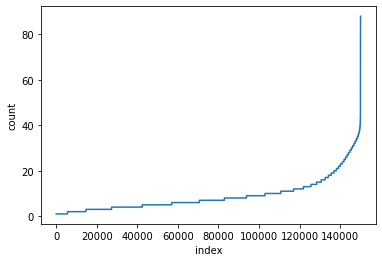

142587


In [8]:
# 150000개 문장의 단어 길이 확인
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.xlabel('index')
plt.ylabel('count')
plt.show()

print(sum([int(l<=25) for l in sentence_len]))
# 15 만개 문장 중 단어 갯수가 25개 이하인 문장의 수가 142590개이다, 25를 sequence_length로 사용

In [9]:
# 단어 정제 및 문장 길이 줄임
# 문장의 최대 길이를 25로 잡고 그 이상은 잘라내고 단어의 앞에서 5글자씩만 잘라서 사용한다
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence[:25]])
sentences = sentences_new
sentences[:5]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나'],
 ['너무재밓었'],
 ['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정'],
 ['사이몬페그',
  '익살스런',
  '연기가',
  '돋보였던',
  '영화',
  '!',
  '스파이더맨',
  '늙어보이기',
  '했던',
  '커스틴',
  '던스트가',
  '너무나도',
  '이뻐보였다']]

In [10]:
#  Tokenizer와 pad_sequences를 사용한 문장 전처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=2000) # 빈도수가 높은 2000개 단어만 사용하여 숫자로 반환하고 나머지는 공백으로 반환
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)  # 인덱스를 반환
train_X = pad_sequences(sequences,padding='post')   # 문장의 뒤부분으로 0을 패딩한다, 공백도 0으로 채워진다

train_X[:5]  # 25개의 길이로 패딩 완성

array([[  25,  884,    8, 1111,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [ 588,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [  71,  346,   31,   35,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [ 106,    4,    2,  869,  573,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0]])

In [11]:
# Tokenizer의 동작 확인
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가']) # 빈도가 낮은 잊혀질'은 공백으로 반환
print(temp)
temp = pad_sequences(temp, padding='post')
print(temp)  # 최대길이가 1이므로 1보다 작은 문장은 0이 패딩된다

경우는
잊혀질
[[], [], [], [106]]
[[  0]
 [  0]
 [  0]
 [106]]
